# 2.1 - The Perceptron

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

## Artificial Neural Networks

In [8]:
%matplotlib inline

Artificial Neural Networks (ANNs) are a kind of bioinspired algorithms able to deal with many different problems in the field of Machine Learning. ANNs  try to emulate the behavior and learning capabilities of biological neural networks, thus they are built following a structure based on the combination of many basic units (neurons) called **perceptrons**. 

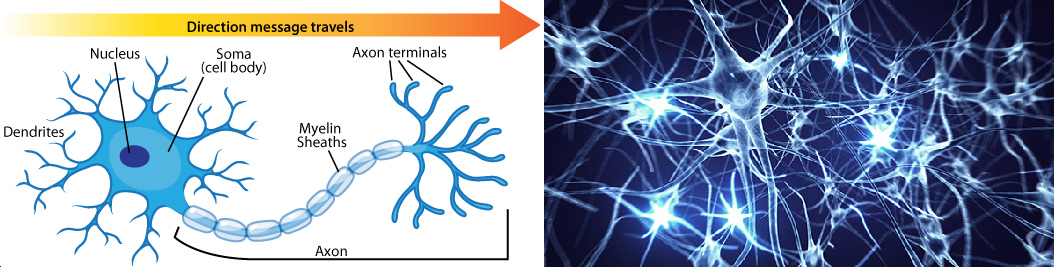

In [9]:
from IPython.display import Image
Image(filename='local/imgs/BNN.png')

Similar to the biological neurons, perceptrons are designed to have two different outputs 1 or 0 (exited/no exited). 

## The perceptron

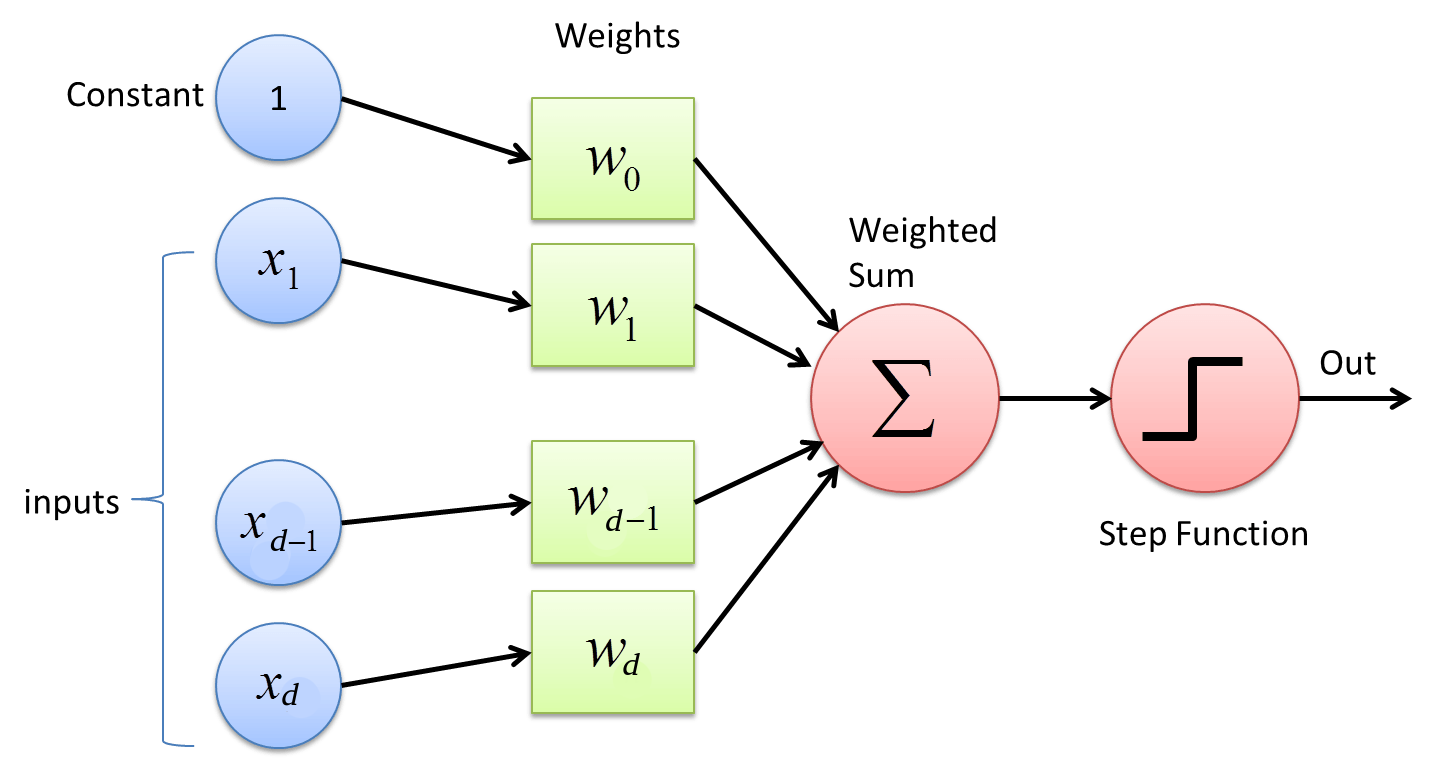

In [10]:
Image(filename='local/imgs/perceptron_.png', width=600)

Where $x_i$ corresponds to an input variable. The set of input variables is typically expressed as a vector ${\bf{x}}=\{x_1,x_2,\cdots,x_d\}$.

Each $w_i$ is a real constants or weight which determines the contribution of the input $x_i$ to the perceptron's output. The output of the perceptron can be expressed as:

$$O(x_1,x_2,...,x_d) = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{if}}\;\;\;w_0  + w_1 x_1  + w_2 x_2  +  \cdots  + w_d x_d  > 0\\
                  0\;\;{\rm{\text{other wise}}}
                \end{array}
              \right. $$

<b>Note</b> that $−w_ 0$ is the threshold that the combination $w_1x_1 + w_2x_2 + \cdots + w_d x_d \;$ must overpass in order to get an output equal to 1. 

By assuming an additional input $x_0 = 1$, an using the sign function ($sgn$), the perceptron can alternatively be expressed as:

$$O({\bf{x}}) = sgn\left(\sum_{i=0}^{d} w_ix_i \right) = sgn({\bf{w}}^T{\bf{x}})$$

where the vector ${\bf{w}}=\{w_0,w_1,w_2,\cdots,w_d\}$.

The sign function must be replaced because it is non differentiable. One option is to use the sigmoid or logistic function:

$$
g(u) = \frac{\exp(u)}{1 + \exp(u)}
$$

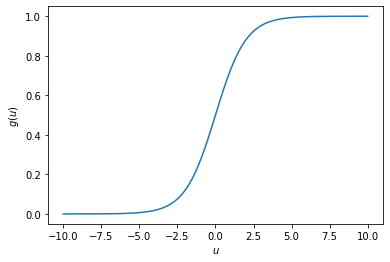

In [11]:
import numpy as np
import matplotlib.pyplot as plt
u=np.linspace(-10,10,100)
g = np.exp(u)/(1 + np.exp(u))
plt.plot(u,g)
plt.xlabel('$u$')
plt.ylabel('$g(u)$')
plt.show()

## Loss function and perceptron training

In a typicall ML problem you are given a dataset $\mathcal{D}=\{({\bf{x}}_j,t_j)\}_{j=1}^{N_s}$, where $N_s$ stands for Number of Samples. ${\bf{x}}_j$ is a vector of inputs and $t_j$ is its corresponding output target.

In order to train the perceptron you must define a loss function, typically an error function that can be used to "penalize" the model when it makes wrong predictions. When the target variables $t_j \in \{0,1\}$ (the prediction corresponds to a classification problem), the most common loss function is the **crossentropy** given by:

$$J({\bf{w}})=-\frac{1}{N_s}\sum_{j=1}^{N_s} t_j\log(g({\bf{w}}^T{\bf{x}}_j)) + (1-t_j)\log(1-g({\bf{w}}^T{\bf{x}}_j))$$

The training of the perceptron can be carried out using the **Gradient Descent** algorithm, which is based on the following rule for iteratively update the weitghs of the perceptron using some criterion $J$:

$${\bf{w}}(\tau) = {\bf{w}}(\tau-1) - \eta\nabla J({\bf{w}})$$

$$w_i(\tau) = w_i(\tau-1) - \frac{\eta}{N_s}\sum_{j=1}^{N_s} (g({\bf{w}}^T{\bf{x}}_j) - t_j)x_{ji}$$

where $\eta$ is the learning rate and $x_{ji}$ is the $i$-th input variable of the $j$-th training sample.

In [12]:
def sigmoide(u):
    g = np.exp(u)/(1 + np.exp(u))
    return g
#Aprendizaje
def Gradiente(MaxIter = 100000, eta = 0.001):
    w = np.array([30,-40,-120])#np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig
    return w, Error

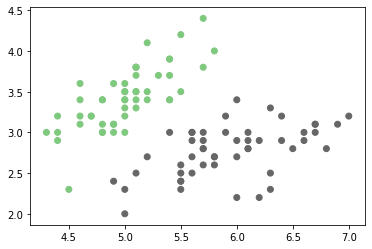

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
fig, ax = plt.subplots(1,1)
ax.scatter(X2[:,0], X2[:,1], c=y2, cmap="Accent");

<IPython.core.display.Javascript object>


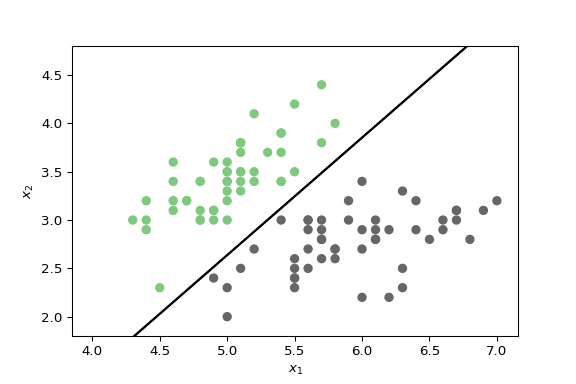

In [15]:
%matplotlib notebook
import time
fig, ax = plt.subplots(1,1)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
ax.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
w,_ = Gradiente(MaxIter = 1)
x1 = np.linspace(4,7,20)
x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
line1, = ax.plot(x1,x2,'k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

for i in range(1,10000,100):
    w,_ = Gradiente(MaxIter = i,eta = 0.01)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    line1.set_ydata(x2)
    if i > 1000:
        ax.set_ylim([1.8,4.8])
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(.300)
line1, = ax.plot(x1,x2,'k')

Text(0, 0.5, 'Loss')

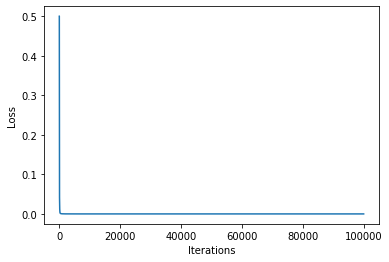

In [16]:
%matplotlib inline 
maxiter = 100000
_,Error = Gradiente(MaxIter = maxiter, eta=0.1)
plt.plot(np.arange(maxiter),Error)
plt.xlabel('Iterations')
plt.ylabel('Loss')

### Now let's thing about the following problem:

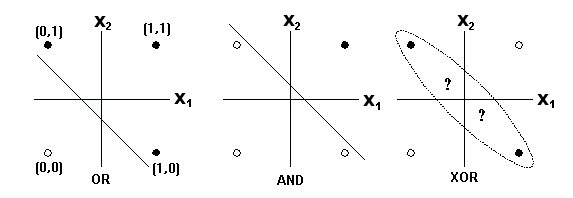

In [18]:
Image(filename='local/imgs/ORANDXOR.png', width=600)

### One single perceptron is not able to solve the problem! 

But we know that XOR can be reconstructed by using two AND and one OR functions

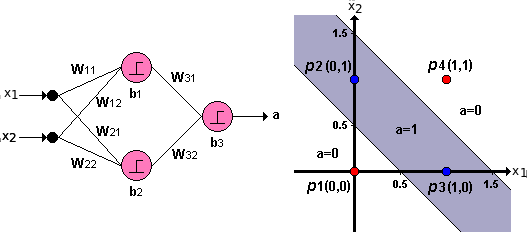

In [19]:
Image(filename='local/imgs/XOR.png', width=600)

### <span style="color:blue">This is a neural network!</span> 

----------------------------------------------------------------------------------------------------------------------------------------------

## Multi-layer perceptron (MLP)

In order to solve more complex problems, several perceptrons can be used together forming what is call a multi-layer perceptron.

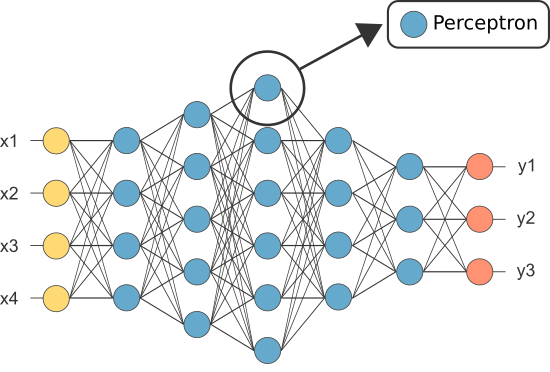

In [20]:
Image(filename='local/imgs/MLP_.png', width=600)

The output $k$ of a MLP with one input layer and one hidden layer can be expressed as:

$$
y_{jk}({\bf{x}}_j,{\bf{w}}) = \sigma\left( \sum_{l=1}^{M_1} w_{kl}^{(2)} h \left( \sum_{i=1}^{d} w_{li}^{(1)} x_{ji} + w_{l0}^{(1)} \right) + w_{k0}^{(2)}\right) 
$$

where $\sigma$ and $h$ are the activation functions for the output and hidden layers respectively. Taking into acount that the net could have more than one output $k$, the cost function in this case must account for the mistakes in each output. For instance, using a least square error function, the cost function can be expressed as:

$$J({\bf{w}}) = \frac{1}{Ns}\sum_{j=1}^{Ns}\sum_{k=1}^{K} (y_{jk} - t_{jk})^2$$

### Backpropagation algorithm

The Backpropagation algorithm is the application of the Gradient Descent algorithm to the neural network. The main difference with respect to the former case, is the fact that for the training of the most inner weights (all the weights in the hidden layers), the derivatives require the application of the **chain rule**.

Lets define some intermediate variables during the forward running of the network:
 
$$
 a_{jl} = \sum_{i=0}^{d} w_{li}^{(1)} x_{ji}, \;\; z_{jl} = h(a_{jl})
$$

$$
 a_{jk} = \sum_{l=0}^{M_1} w_{kl}^{(2)} z_{jl}, \;\; y_{jk} = \sigma(a_{jk})
$$

The gradients for the gradient descent algorithm in the output layer can be calculated as:

$$\frac{\partial J}{\partial w_{kl}^{(2)}} = \frac{\partial J}{\partial y_k}\frac{d \sigma}{d a_{k}} \frac{\partial a_{k}}{\partial w_{kl}^{(2)}}$$

$$\frac{\partial J}{\partial w_{kl}^{(2)}} = \frac{1}{N_s}\sum_{j=1}^{Ns} (y_{jk}-t_{jk})\dot{\sigma}(a_{jk}) z_{jl}$$

For the hidden layer the gradient can be calculated as:

$$\frac{\partial J}{\partial w_{li}^{(1)}} = \frac{1}{Ns}\sum_{j=1}^{Ns}\sum_{k=1}^{K}(y_{jk}-t_{jk})\dot{\sigma}(a_{jk})\frac{\partial a_{jk}}{z_l}\frac{\partial z_{jl}}{w_{li}^{(1)}}$$

$$\frac{\partial J}{\partial w_{li}^{(1)}} = \frac{1}{Ns}\sum_{j=1}^{Ns}\sum_{k=1}^{K}(y_{jk}-t_{jk})\dot{\sigma}(a_{jk})w_{kl}^{(2)}\dot{h}(a_{jl})x_{ji}$$

The gradients can be easily extended to more layers because they follow the same formulation.

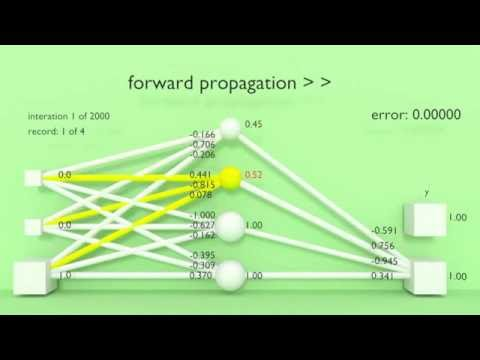

In [21]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('OwdjRYUPngE', width=700, height=500)

## Classical activation functions

### Logistic

$$
g(u) = \frac{\exp(u)}{1 + \exp(u)} = \frac{1}{1 + \exp(-u)}
$$

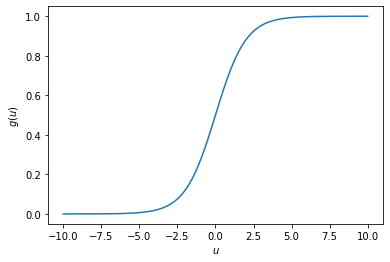

In [22]:
u=np.linspace(-10,10,100)
g = np.exp(u)/(1 + np.exp(u))
plt.plot(u,g)
plt.xlabel('$u$')
plt.ylabel('$g(u)$')
plt.show()

Derivative: $$\frac{\partial g(u)}{\partial w_i} = g(u)(1-g(u))\frac{\partial u}{\partial w_i}$$.

### Hyperbolic tangent 

$$g(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}$$

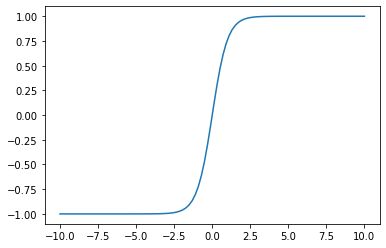

In [24]:
g = (np.exp(u) - np.exp(-u))/(np.exp(u) + np.exp(-u))
plt.plot(u,g)
plt.show()

Derivative: $$\frac{\partial g(u)}{\partial w_i} = (1 - (g(u))^2) \frac{\partial u}{\partial w_i}$$

### Softmax

$$g(u_k) = \frac{\exp(u_k)}{\sum_{l=1}^K \exp(u_l)}$$

Derivative: $$ \frac{\partial g(u_i)}{\partial u_j} = g(u_i)(\delta_{ij}-g(u_j))$$

$$\delta_{ij} = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{if}}\;\;\;i=j\\
                  0\;\;\;{\rm{if}}\;\;\;i \neq j
                \end{array}
              \right. $$

## Batch, Minibatch and online learning

In order to trainig the MLP, the following quantities must be estimated in every iteration:

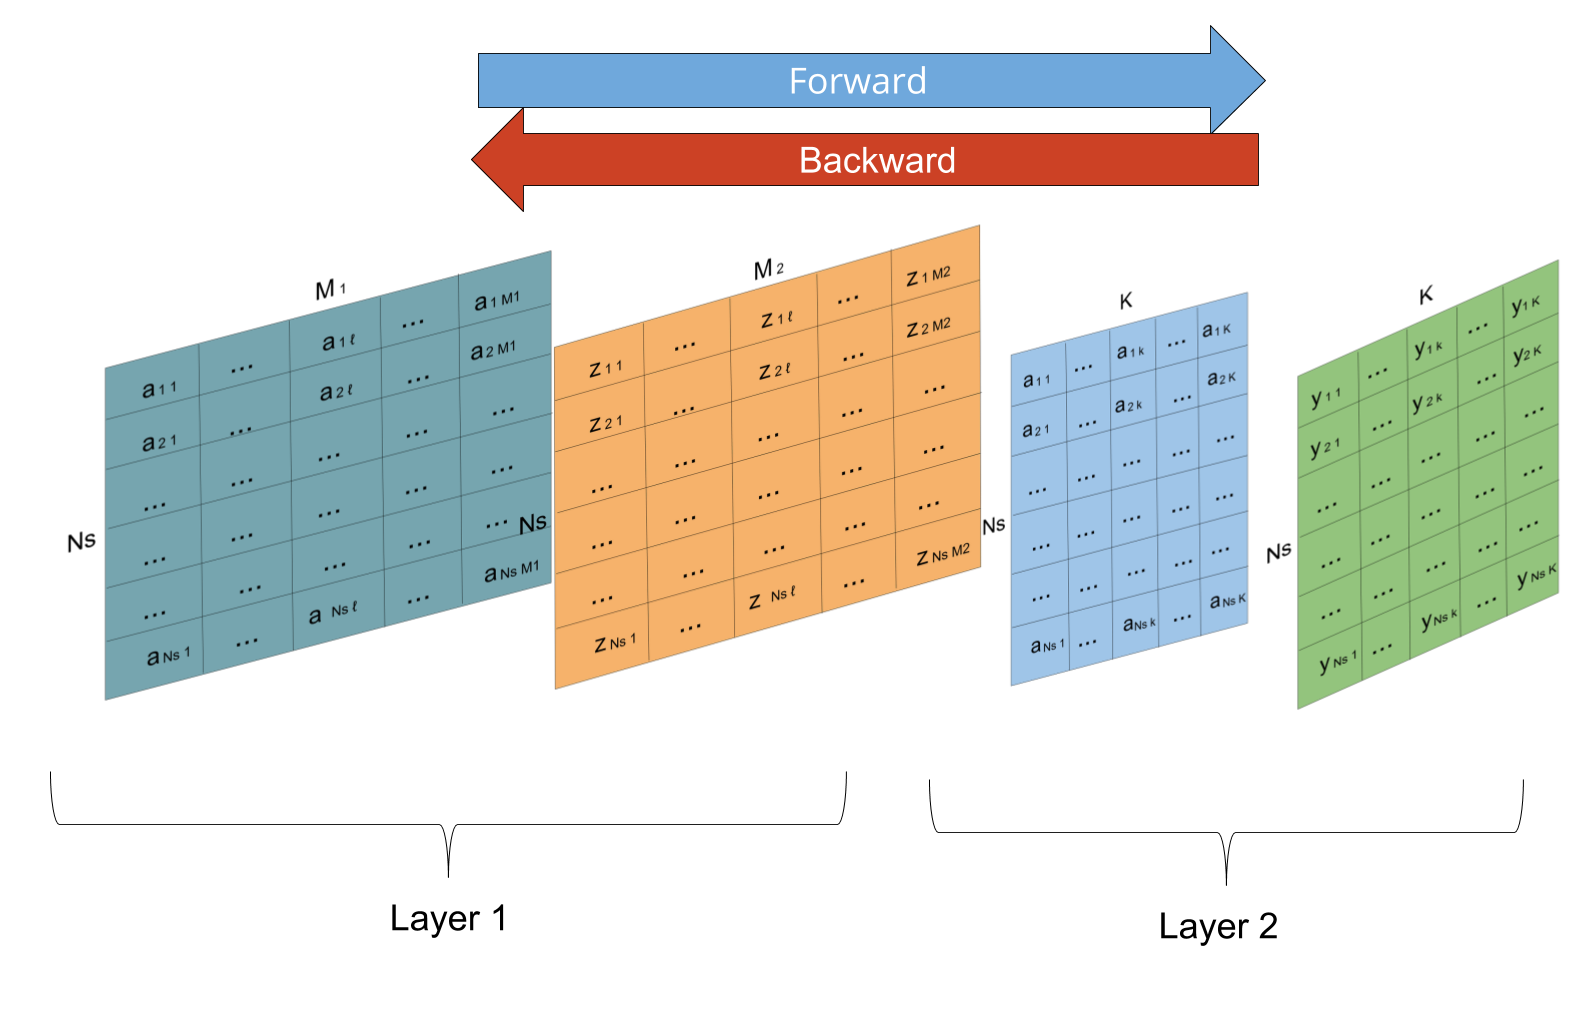

In [25]:
Image(filename='local/imgs/ForwardBackward.png')

The training that acumulates the errors from all the training samples before carrying out the update of the network weights is called **Batch training**. Unfortunately, if the number of training samples is very large, the running of every iteration becomes intratale, because both the amount of calculations (CPU time) and amount of memory (RAM) required to perform matrix multiplications and to save partial results. But the real handicap is the batch gradient trajectory land you in a bad spot (**saddle point**).

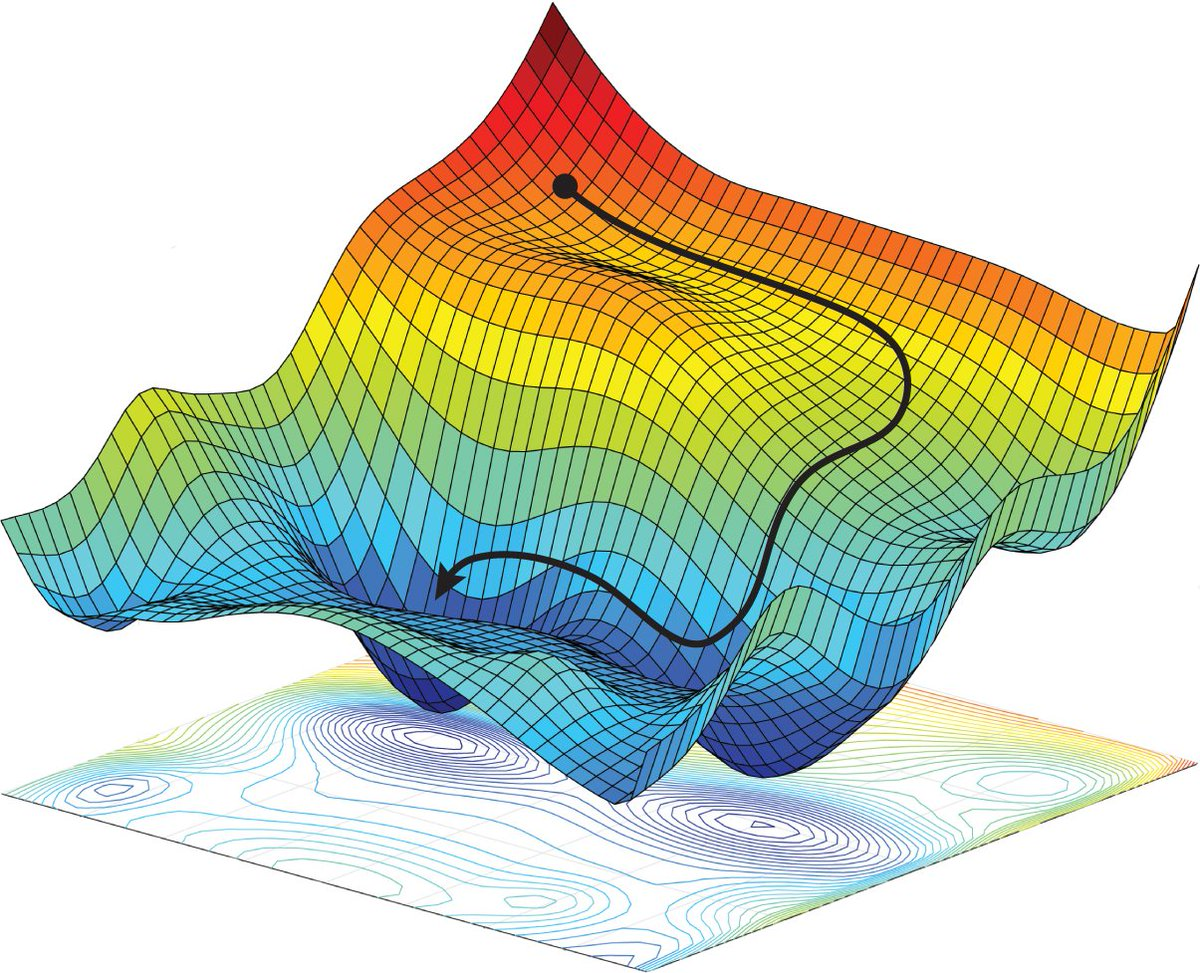

In [26]:
Image(filename='local/imgs/Optimi_surface.jpg', width=600)

As an alternative, the training of the MLP can be carried out by propagating a single sample forward throught the net, and then update the weights of the MLP using the estimated error for that single sample according to the Backpropagation algorithm. These two steps are repeated for every sample in the training set. This strategy is called **on-line learning** and the resulting algorithm is called **Stochastic Gradient Descent (SGD)**. Since it's based on one random data point, it's very noisy and may go off in a direction far from the batch gradient. However, the noisiness is exactly what you want in non-convex optimization, because it helps you escape from saddle points or local minima.  

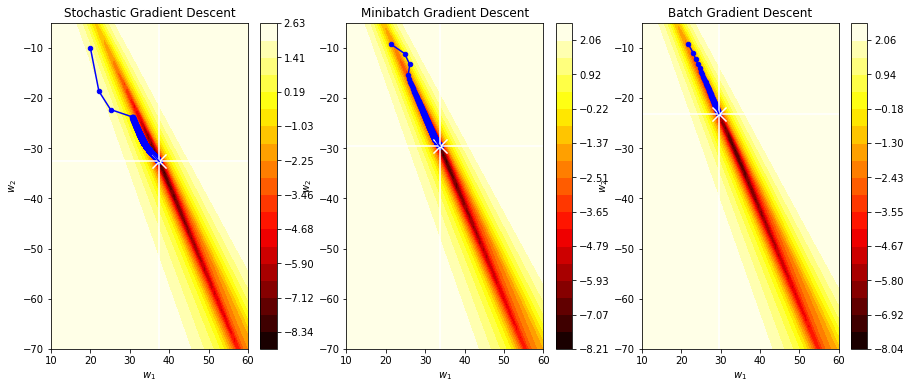

In [28]:
from local.lib.PerceptronExample import Plot_SGD_trajectory
Plot_SGD_trajectory()

One of the problems with the SGD algorithm is that since the updates depend on a single sample, instead of the accumulation of the error for the whole training set, the convergence of the algorithm is slower, requiring more epochs to get the optimum. Therefore, an intermediate solution, called **Mini-batch gradient descent**, split the training samples into mini-batchs, and execute and update of the weigths (forward and backward steps) per mini-batch. The mini-batch gradient descent is a trade-off between memory load and rate of convergence. 

### Example using a toy dataset:

(1500, 2)


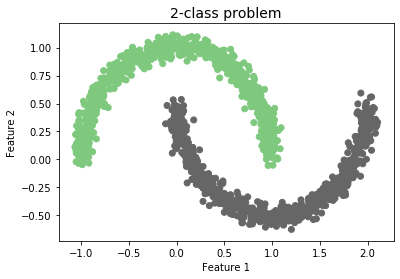

In [29]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
print(X.shape)
plt.title('2-class problem', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X[:,0], X[:,1], c=y,cmap="Accent");

In [ ]:
!pip install neurolab

Epoch: 15; Error: 0.233517217172232;
The goal of learning is reached


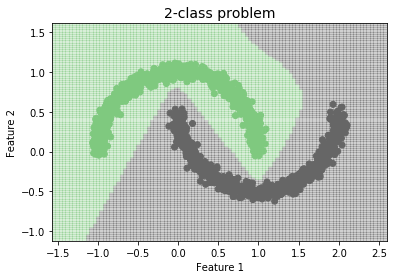

In [30]:
import numpy as np
import neurolab as nl
from matplotlib.colors import ListedColormap
# Create train samples
input = X
target = np.array(y)[np.newaxis]
target = target.T
# Create network with 2 inputs, 5 neurons in input layer and 1 in output layer
net = nl.net.newff([[X.min(), X.max()], [y.min(), y.max()]], [5, 1],  [nl.trans.LogSig(),nl.trans.LogSig()])
# Train process
err = net.train(input, target, show=15)
# Test
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        #print([xx[1,i],yy[j,1]])
        Z[i,j]=net.sim([[xx[1,i],yy[j,1]]])
Z = np.round(Z)
plt.title('2-class problem', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.pcolormesh(xx, yy, Z.T, cmap="Accent",alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="Accent");

1 ok
2 ok
3 ok


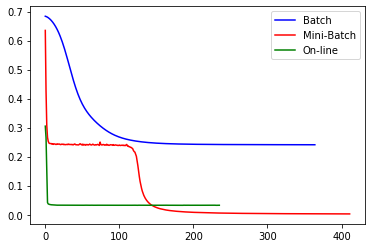

In [31]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1, max_iter=2000, n_iter_no_change=200)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1, max_iter=2000, n_iter_no_change=200)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1, max_iter=2000, n_iter_no_change=200)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()
plt.show()

1 ok
2 ok
3 ok


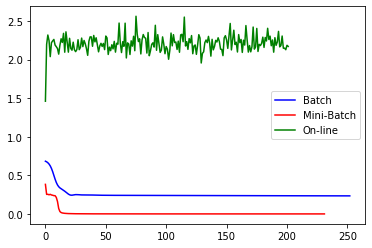

In [32]:
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,max_iter=2000, n_iter_no_change=200)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1, max_iter=2000, n_iter_no_change=200)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,max_iter=2000, n_iter_no_change=200)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()
plt.show()

## Drawbacks of the classical approaches

**Inflexibility**

* Classifical approaches require an entire formulation if you want to change the loss function or test a slightly different architecture.
* A new arquitecture require the calculation of all the re-estimation formulas, without taking advantage of symbolic derivative tools.
* Some classical frameworks support regularization of ANN, but they do not include the most recent advances.
* There are new activation functions that avoid problems, such as vanishing phenomenon, when the number of layers is large.
* Classical frameworks do not take advantage on parallelism.
* Transfer learning

[1] Simon Haykin, Neural Networks and Learning Machines, 3ra Edición, Prentice Hall, USA, 2009.